In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"  # Opens the plot in a web browser
import numpy as np
import os
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


In [2]:
result_dir = "/home/yyj/Desktop/yyj/thesis/code/PETSQL/data/process/vote/202504/PPL_DEV.JSON-9_SHOT_Euclidean_mask_1034_base_wma"
file_path = os.path.join(result_dir, "results_1.json")

In [3]:

# 讀取 JSON 檔案
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

In [4]:
import pandas as pd
import plotly.express as px

# 初始化 DataFrame
records = []

for entry in data:
    index = entry["index"]
    weights = entry["current_weights"]
    for model, weight in weights.items():
        records.append({"index": index, "model": model, "weight_value": weight})

df = pd.DataFrame(records)

# 確保數據格式正確並轉換為長格式
df_melted = df.pivot(index="index", columns="model", values="weight_value").reset_index().melt(
    id_vars=["index"], var_name="model", value_name="weight_value"
)

# 按 index 分組，對 weight_value 進行排序，新增 rank 欄位
df_melted["rank"] = df_melted.groupby("index")["weight_value"].rank(ascending=False, method="first")

# 按 index 和 weight_value 排序，確保 hover 顯示時權重由大到小排列
df_melted = df_melted.sort_values(by=["index", "weight_value"], ascending=[True, False])

# 使用 Plotly 繪製互動式折線圖
fig = px.line(
    df_melted,
    x="index",
    y="weight_value",
    color="model",
    markers=True,
    title="Voting Strategy Model Weights on Spider 1.0 Dev",
    hover_data={"model": True, "weight_value": ":.6f", "rank": True} , # 顯示 rank
)

# Update layout to include subtitle and font settings
fig.update_layout(
    title={
        "text": "Voting Strategy Model Weights on Spider 1.0 Dev<br><sup>(1) Baseline PETSQL - No schema linking, no self‑refinement</sup>",
        "x": 0.5,  # Center the title
        "xanchor": "center",
        "yanchor": "top",
    },
    xaxis_title="Rounds",
    yaxis_title="Error Rate",
    hovermode="x unified",
    font=dict(
        family="Arial, sans-serif",  # Set font family
        size=14,  # Set font size
        color="black"  # Set font color
    ),
)

# 顯示互動式圖表
fig.show()


In [ ]:
subtitle = "(1) Baseline PETSQL - No schema linking, no self‑refinement"

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

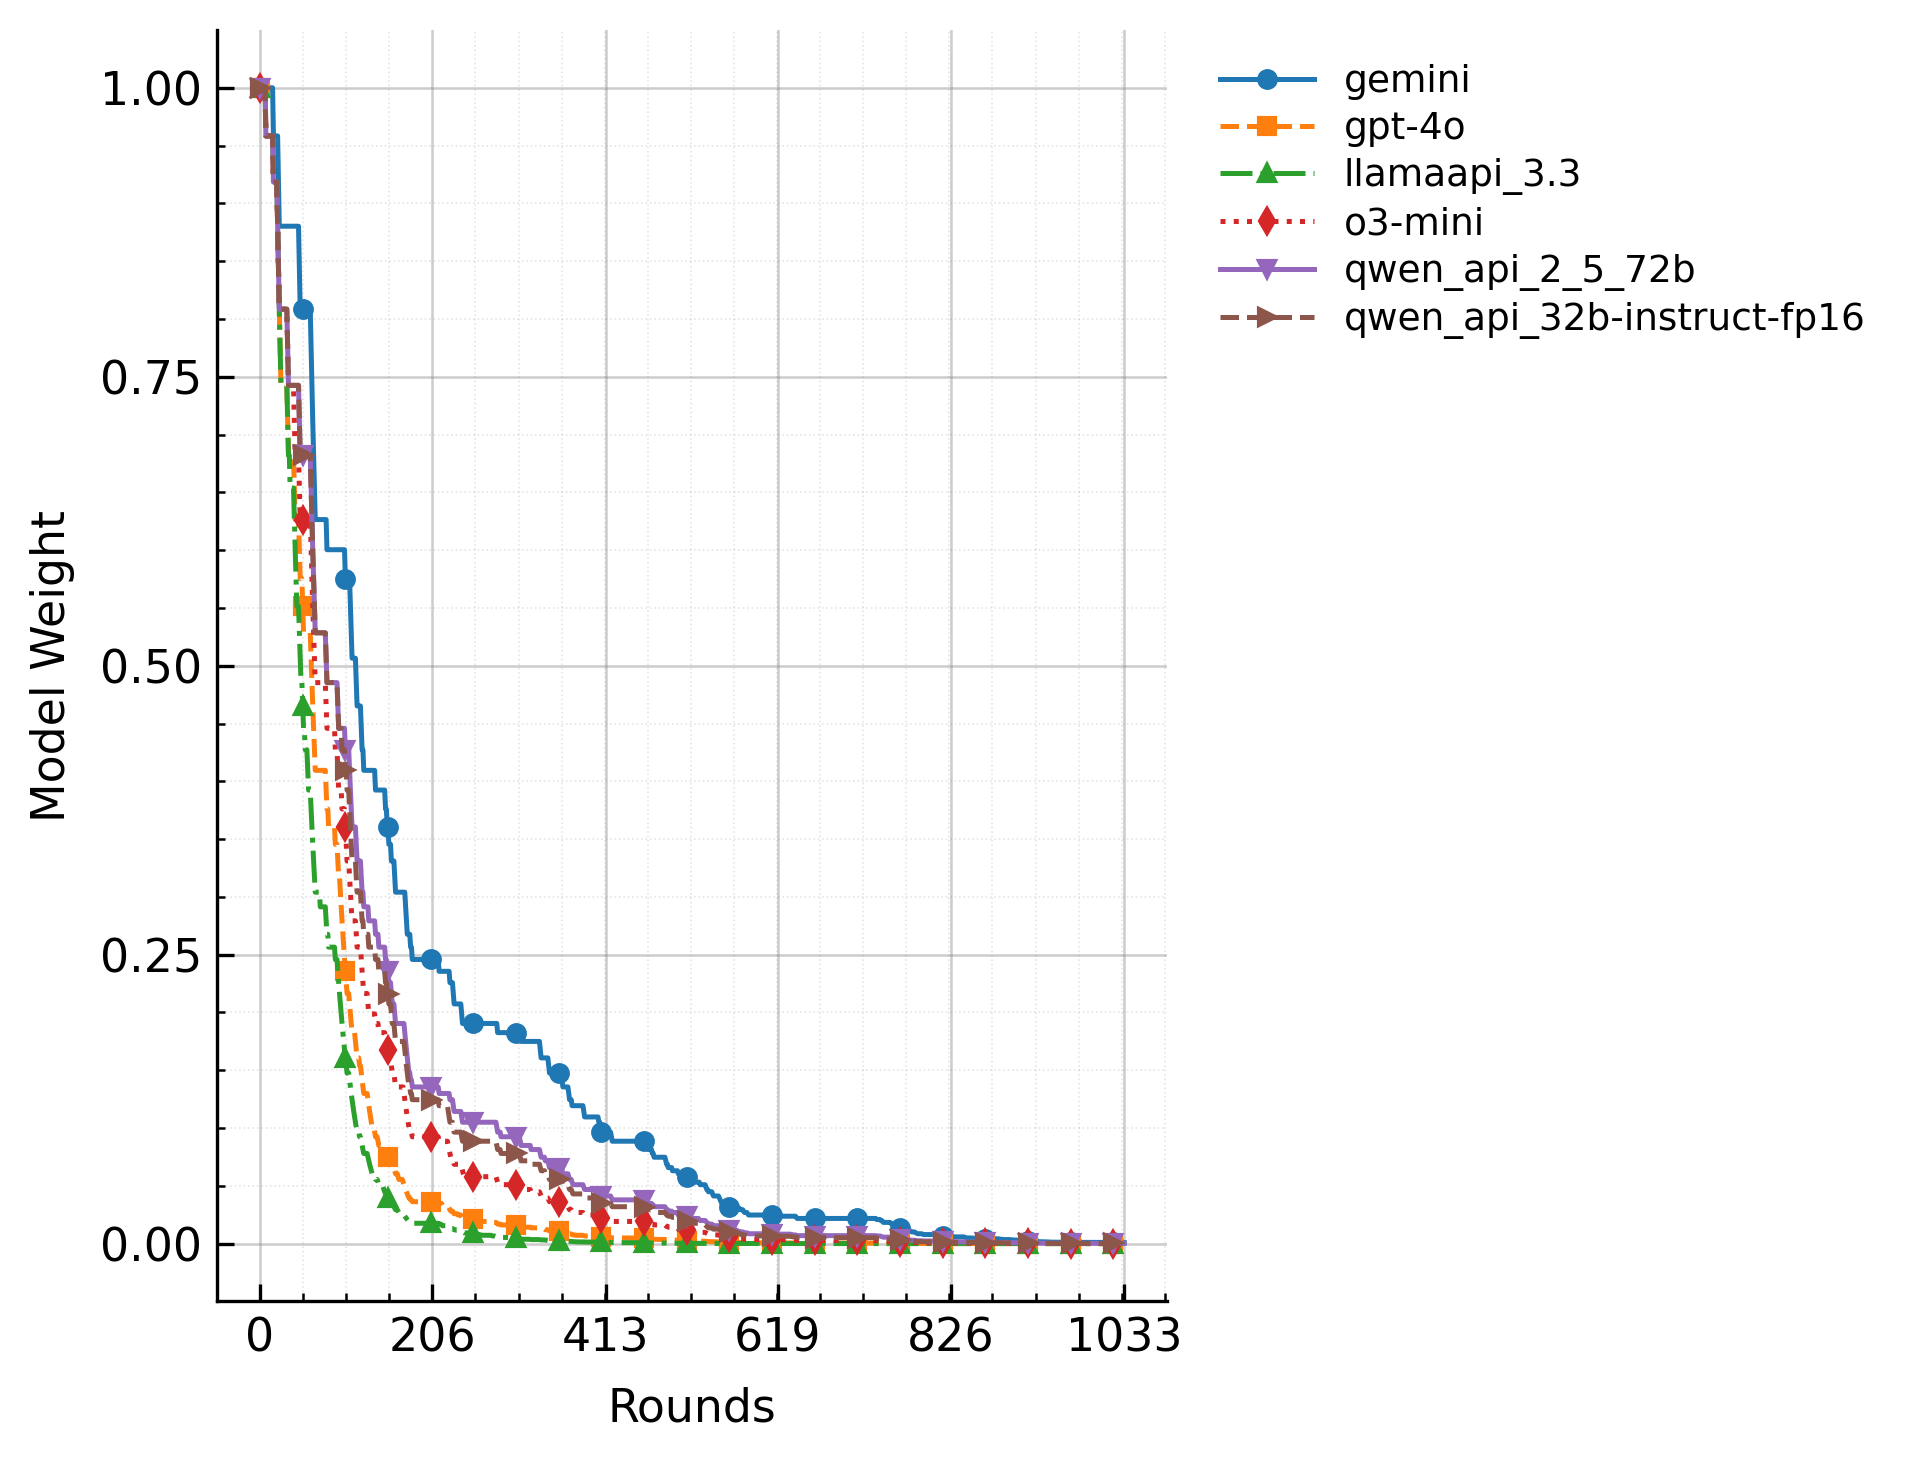

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# --- 2) 构建 DataFrame ---
records = []
for entry in data:
    idx = entry["index"]
    for model, w in entry["current_weights"].items():
        records.append({"round": idx, "model": model, "weight": w})
df = pd.DataFrame(records)

# Pivot 成每列一个模型
df_pivot = df.pivot(index="round", columns="model", values="weight")
rounds = df_pivot.index.values
models = df_pivot.columns.tolist()

# === 3) Matplotlib 论文风格设置 ===
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "font.size": 11,
    "axes.linewidth": 0.8,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 4,
    "ytick.major.size": 4,
    "legend.frameon": False,
})

fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

# 为每个模型画一条折线，使用不同线型/marker
linestyles = ['-', '--', '-.', ':']
markers     = ['o', 's', '^', 'd', 'v', '>', '<', 'p', 'h']
for i, model in enumerate(models):
    style = linestyles[i % len(linestyles)]
    m     = markers[i % len(markers)]
    ax.plot(rounds, df_pivot[model],
            linestyle=style,
            marker=m,
            markevery= max(1, len(rounds)//20),  # 稀疏 marker
            markersize=4,
            linewidth=1.2,
            label=model)

# 坐标轴与网格
ax.set_xlabel('Rounds', labelpad=6)
ax.set_ylabel('Model Weight', labelpad=6)

ax.set_title(f'Voting Strategy Model Weights on Spider 1.0 Dev \n {subtitle}', fontsize=14, pad=10)


# 主次刻度
ax.set_xticks(np.linspace(rounds.min(), rounds.max(), 6, dtype=int))
ax.set_yticks(np.linspace(0, df_pivot.values.max(), 5))
ax.grid(which='major', linestyle='-',  linewidth=0.6, color='grey', alpha=0.4)
ax.grid(which='minor', linestyle=':',  linewidth=0.4, color='grey', alpha=0.2)
ax.minorticks_on()

# 去掉上、右框线
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 图例放外面
ax.legend(loc='upper left',
         bbox_to_anchor=(1.02, 1.0),
          fontsize=10,
    handlelength=2.0,
    labelspacing=0.4,
    borderaxespad=0)

# 调整布局，给图例留空
plt.tight_layout(rect=[0, 0, 0.85, 1])
# 保存高分辨率图
plt.savefig('model_weights_spider_dev.png', dpi=300, bbox_inches='tight')
# plt.savefig('model_weights_spider_dev.pdf', bbox_inches='tight')
plt.show()


# error bound

In [6]:
final_path = os.path.join(result_dir, "final_result_1.json")
current_error_path = os.path.join(result_dir, "current_error.json")
N = 6  # 專家數量


with open(final_path, "r", encoding="utf-8") as f:
    final_data = json.load(f)
with open(current_error_path, "r", encoding="utf-8") as f:
    current_errors = json.load(f)

In [7]:

# 转成纯数字列表
numeric_errors = [list(d.values())[0] for d in current_errors]

# 建立 records，三種曲線共用
records = []
for idx, rec in enumerate(final_data):
    rnd = idx + 1
    eps    = rec["current_epsilon"]
    M_star = rec["best_expert_mistakes"]
    err    = numeric_errors[idx]
    # 計算 WMA 理論誤差界限
    # bound = 2 * (1 + eps) * M_star + (2 * np.log(N)) / eps

    records.append({"Round": rnd, "Metric": "Final Error Rate",       "Value": err / rnd})
    records.append({"Round": rnd, "Metric": "Best Expert Error Rate", "Value": M_star / rnd})
    records.append({"Round": rnd, "Metric": "Error Bound",             "Value": (err-M_star) / rnd})

df = pd.DataFrame(records)

# 繪製互動式 Plotly 折線圖
fig = px.line(
    df,
    x="Round",
    y="Value",
    color="Metric",
    markers=True,
    title="Voting Error Bound Rates of PETSQL Pipeline Variants on Spider 1.0 Dev",
    template="plotly_dark"
)

fig.update_layout(
    xaxis_title="Rounds",
    yaxis_title="Error Rate",
    hovermode="x unified",
    
)

fig.show()


findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

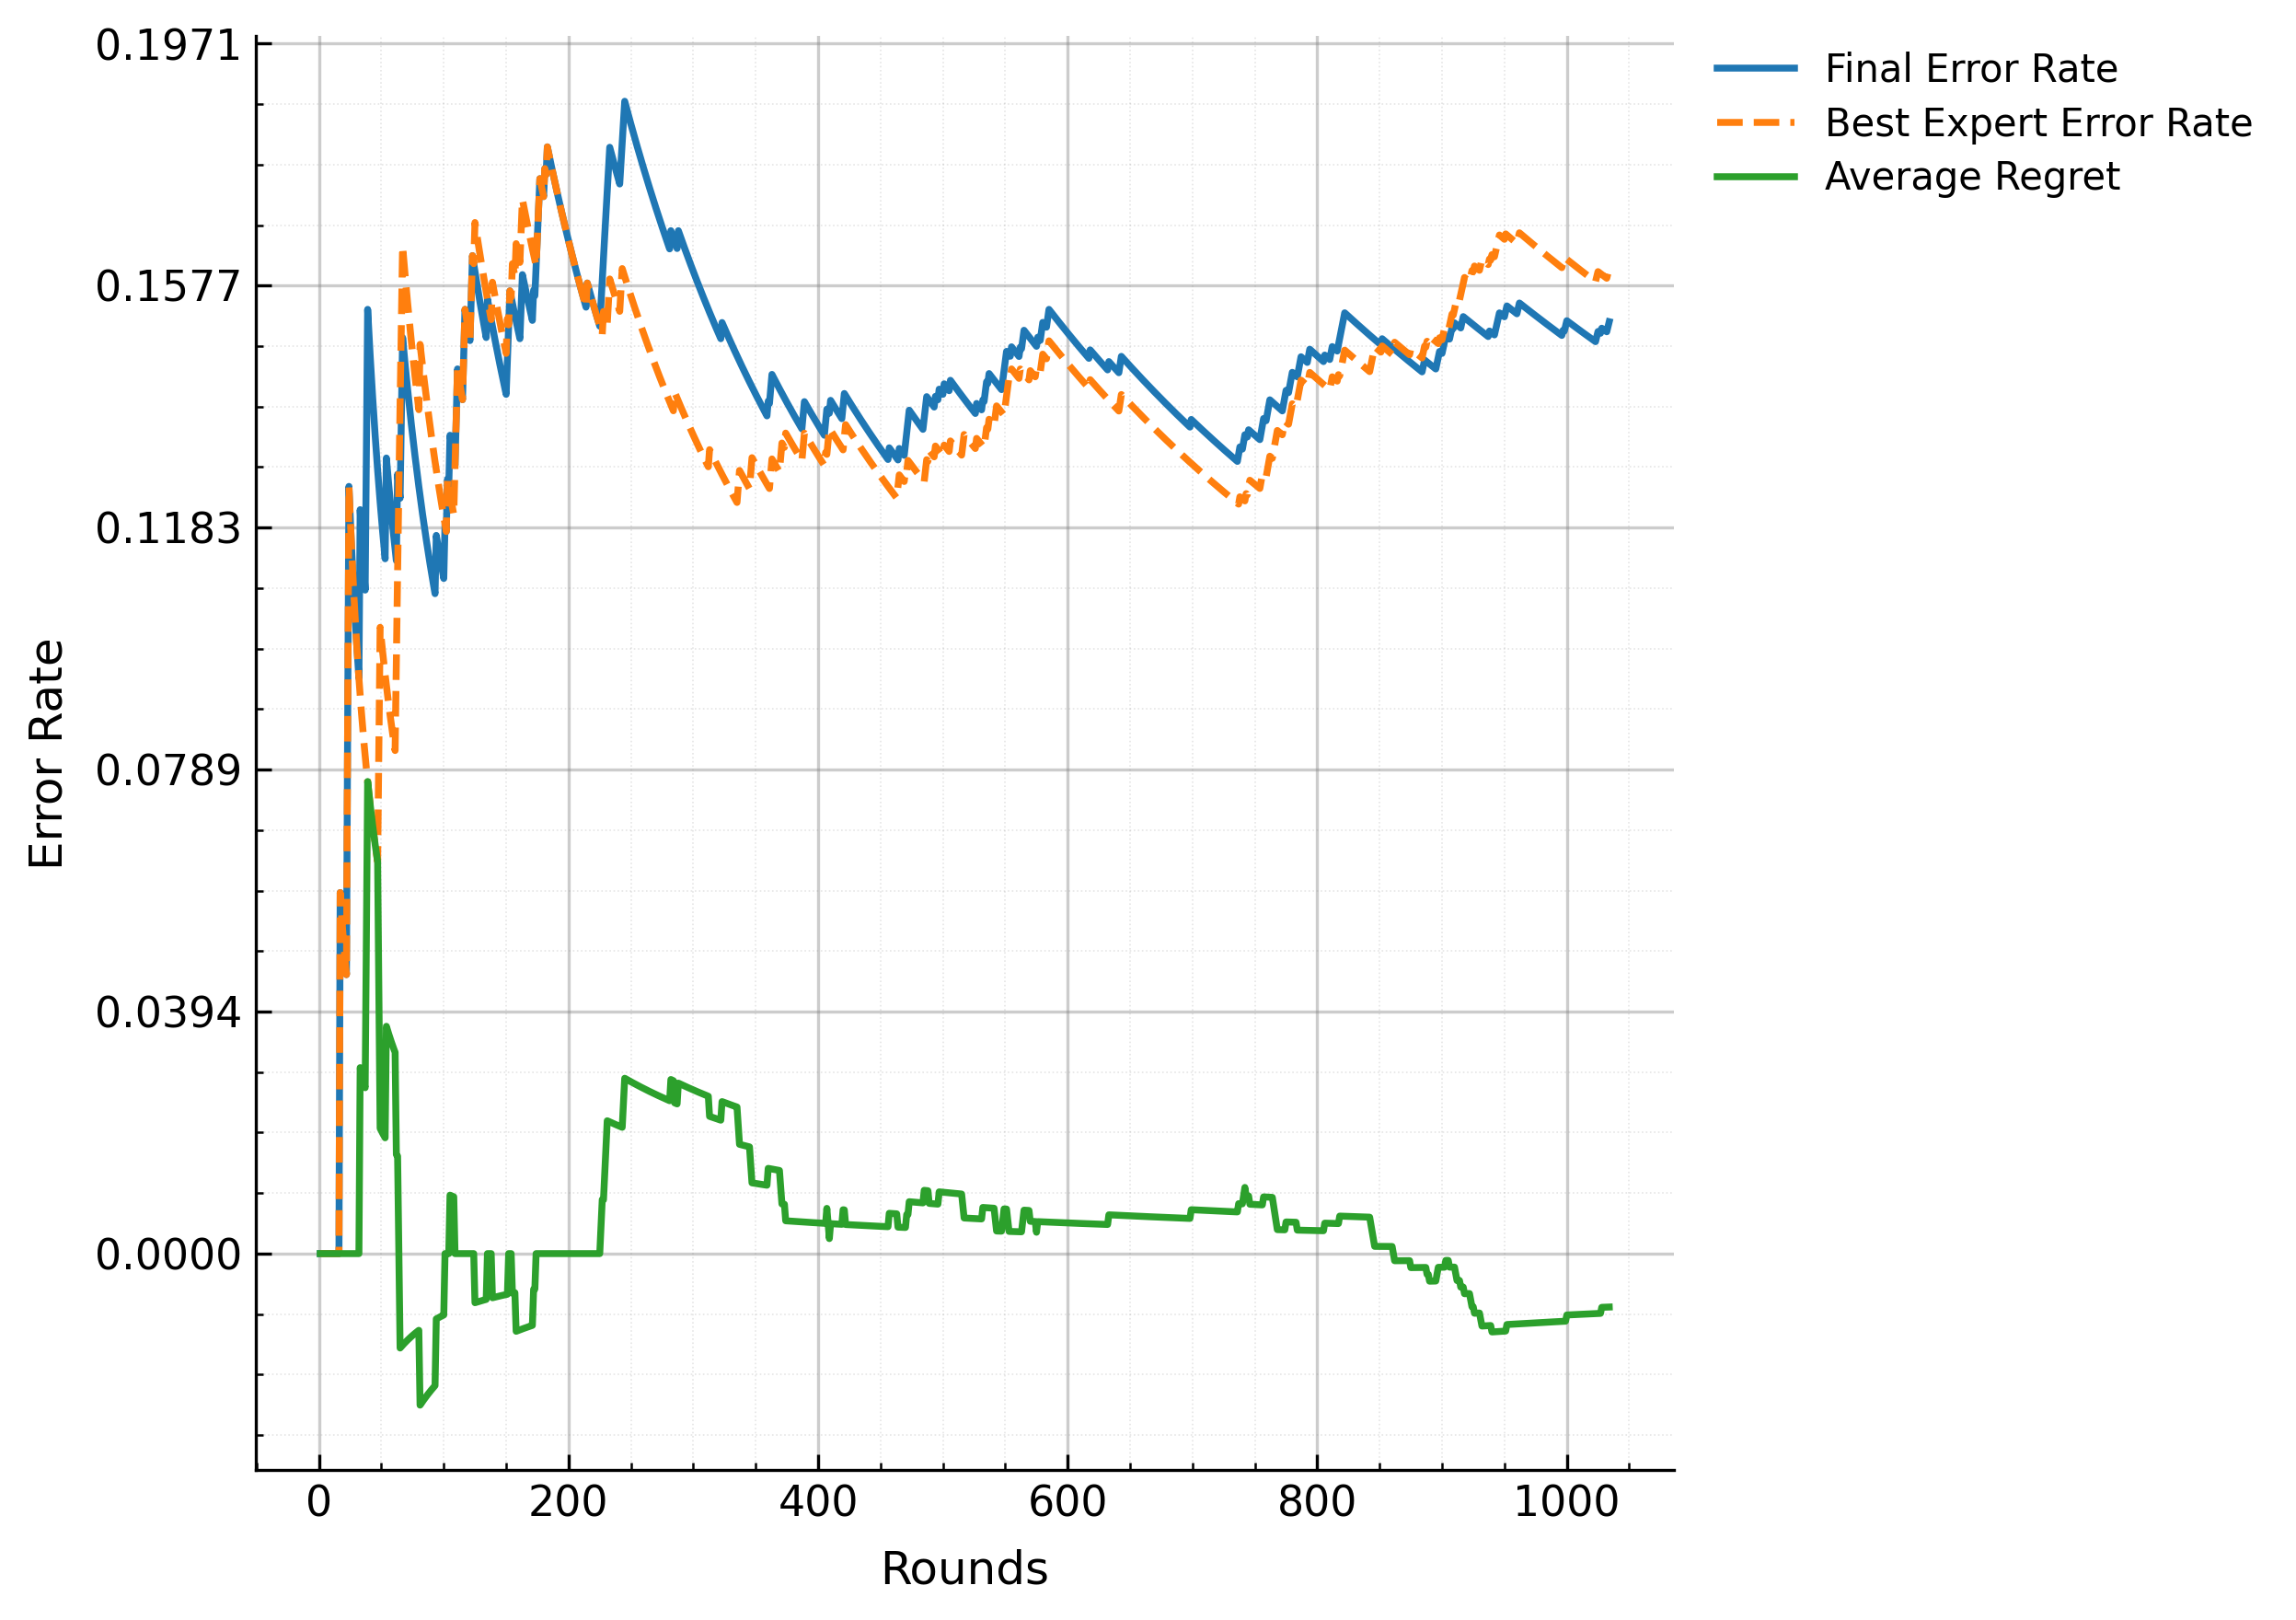

In [8]:
# === 2) 数据预处理 ===
# 把 current_errors 转成纯数字列表
numeric_errors = [list(d.values())[0] for d in current_errors]

# 生成回合索引
rounds = np.arange(1, len(final_data) + 1)

# 计算三条曲线的数值
final_err = [numeric_errors[i] / rounds[i] for i in range(len(rounds))]
best_err  = [final_data[i]["best_expert_mistakes"] / rounds[i] for i in range(len(rounds))]
regret    = [(numeric_errors[i] - final_data[i]["best_expert_mistakes"]) / rounds[i]
             for i in range(len(rounds))]

# === 3) 画图设置，论文发布级别样式 ===
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# Final Error Rate：实线
ax.plot(rounds, final_err,
        color='tab:blue', lw=1.8,
        label='Final Error Rate')

# Best Expert Error Rate：虚线
ax.plot(rounds, best_err,
        color='tab:orange', lw=1.8, linestyle='--',
        label='Best Expert Error Rate')

# Average Regret：点线
ax.plot(rounds, regret,
        color='tab:green', lw=1.8, linestyle='-',
        label='Average Regret')

# 设置主次网格
ax.set_xticks(np.arange(0, len(rounds)+1, 200))
ax.set_yticks(np.linspace(0, max(final_err + best_err + regret) * 1.05, 6))
ax.grid(which='major', linestyle='-',  linewidth=0.8, color='grey', alpha=0.4)
ax.grid(which='minor', linestyle=':',  linewidth=0.4, color='grey', alpha=0.2)
ax.minorticks_on()

# 坐标标签
ax.set_xlabel('Rounds', fontsize=12, labelpad=6)
ax.set_ylabel('Error Rate', fontsize=12, labelpad=6)

# 隐藏上和右边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 瘦身图例，放到图外
leg = ax.legend(
    loc='upper left',
    bbox_to_anchor=(1.02, 1.0),
    fontsize=10,
    handlelength=2.0,
    labelspacing=0.4,
    borderaxespad=0
)

# 调整布局，给图例留空
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

## final answer

In [8]:
final_path ="/home/yyj/Desktop/yyj/thesis/code/PETSQL/data/process/PPL_DEV.JSON-9_SHOT_Euclidean_mask_1034/results_1.json"
# 讀取 JSON 檔案
with open(final_path, "r", encoding="utf-8") as f:
    final_data = json.load(f)
print(len(final_data))

FileNotFoundError: [Errno 2] No such file or directory: '/home/yyj/Desktop/yyj/thesis/code/PETSQL/data/process/PPL_DEV.JSON-9_SHOT_Euclidean_mask_1034/results_1.json'

In [ ]:
# Extract `final_sql` values
final_sql_statements = [entry["final_sql"] for entry in final_data]
print(f"Extracted {len(final_sql_statements)} SQL statements")
output_txt_file = "/home/yyj/Desktop/yyj/thesis/code/PETSQL/data/process/PPL_DEV.JSON-9_SHOT_Euclidean_mask_1034/final_sql_1.txt"

# Write to a text file
with open(output_txt_file, "w", encoding="utf-8") as f:
    for sql in final_sql_statements:
        sql_str = str(sql) if sql is not None else ""
        f.write(sql_str + "\n")

print(f"Successfully written {len(final_sql_statements)} SQL statements to {output_txt_file}")

Extracted 1034 SQL statements
Successfully written 1034 SQL statements to /home/yyj/Desktop/yyj/thesis/code/PETSQL/data/process/PPL_DEV.JSON-9_SHOT_Euclidean_mask_1034/final_sql_1.txt


In [ ]:
output_txt_file_1 = '/home/yyj/Desktop/yyj/thesis/code/PETSQL/data/process/PPL_DEV.JSON-9_SHOT_Euclidean_mask_1034_3/epsilon/final_sql_0.01.txt'
# Write to a text file
with open(output_txt_file_1) as f:
    output_1 = [l.strip().split('\t') for l in f.readlines() if len(l.strip()) > 0]
output_txt_file_2 = '/home/yyj/Desktop/yyj/thesis/code/PETSQL/data/process/PPL_DEV.JSON-9_SHOT_Euclidean_mask_1034_3/epsilon/final_sql_0.005.txt'
# Write to a text file
with open(output_txt_file_2) as f:
    output_2 = [l.strip().split('\t') for l in f.readlines() if len(l.strip()) > 0]
same = False
if output_1 == output_2:
    same = True

In [ ]:
same

False